In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel(r"C:\Users\Asus\Desktop\DDP\1D_master_dataset.xlsx")

In [5]:
data.head()

,Time(s),Alpha,X,x/L,T_left,T_right,T_initial,Temperature
0,0.01,0.0001,0.0,0.0,300,0,27,300.0
1,0.02,0.0001,0.0,0.0,300,0,27,300.0
2,0.03,0.0001,0.0,0.0,300,0,27,300.0
3,0.05,0.0001,0.0,0.0,300,0,27,300.0
4,0.10,0.0001,0.0,0.0,300,0,27,300.0


In [6]:
data.describe()

,Time(s),Alpha,X,x/L,T_left,T_right,T_initial,Temperature
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.0,5824.000000
mean,16.665962,0.000036,0.005000,0.500000,450.000000,150.000000,27.0,210.387281
std,35.998539,0.000045,0.003334,0.333362,111.812999,111.812999,0.0,166.656319
min,0.010000,0.000001,0.000000,0.000000,300.000000,0.000000,27.0,0.000000
25%,0.100000,0.000001,0.001667,0.166667,375.000000,75.000000,27.0,44.796381
50%,1.000000,0.000010,0.005000,0.500000,450.000000,150.000000,27.0,200.000000
75%,12.500000,0.000100,0.008333,0.833333,525.000000,225.000000,27.0,308.496669
max,200.000000,0.000100,0.010000,1.000000,600.000000,300.000000,27.0,600.000000


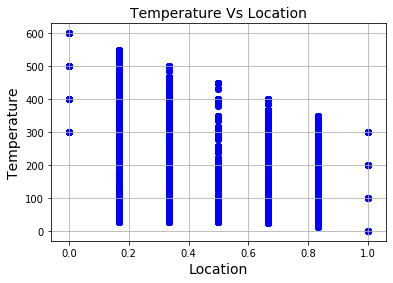

In [7]:
plt.scatter(data['x/L'], data['Temperature'], color='blue')
plt.title('Temperature Vs Location', fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

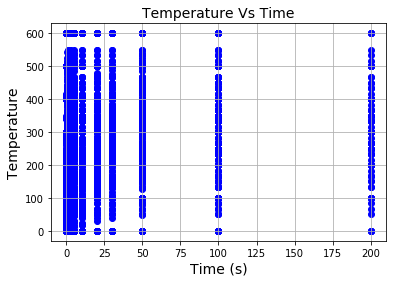

In [8]:
plt.scatter(data['Time(s)'], data['Temperature'], color='blue')
plt.title('Temperature Vs Time', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

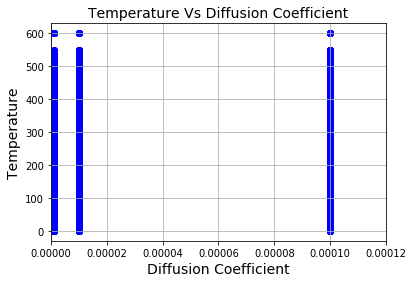

In [9]:
plt.scatter(data['Alpha'], data['Temperature'], color='blue')
plt.title('Temperature Vs Diffusion Coefficient', fontsize=14)
plt.xlabel('Diffusion Coefficient', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.xlim([0, 1.2E-4])
plt.show()

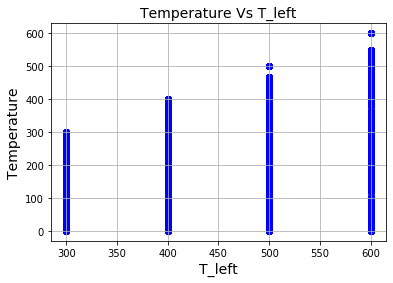

In [10]:
plt.scatter(data['T_left'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_left', fontsize=14)
plt.xlabel('T_left', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

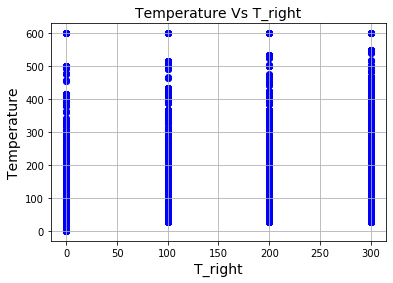

In [11]:
plt.scatter(data['T_right'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_right', fontsize=14)
plt.xlabel('T_right', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['T_left', 'T_right','Time(s)', 'Alpha', 'x/L']]
y = data['Temperature']
x.shape, y.shape

((5824, 5), (5824,))

In [13]:
import time
#storing starting time
begin = time.time()

#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth= 8, random_state=100, oob_score = True)

In [15]:
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=100, verbose=0, warm_start=False)

In [16]:
y_pred = rf.predict(test_x)
print (y_pred)

[280.09095908 329.29460265 400.         ...  44.89139723  27.73821392
  29.50665372]


In [17]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.9839437744618647

In [18]:
#storing end time
time.sleep(1)
end = time.time()

In [19]:
#Calculating runtime
print ("Total runtime of Random Forest program (in seconds) is", end - begin)

Total runtime of Random Forest program (in seconds) is 2.897547721862793


In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 13.147520660010576
Mean Squared Error: 462.5657150246544
Root Mean Squared Error: 21.507340956628145


In [21]:
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


In [22]:
importances.head()

,importance
feature,
x/L,0.491
Time(s),0.225
T_left,0.107
T_right,0.104
Alpha,0.073


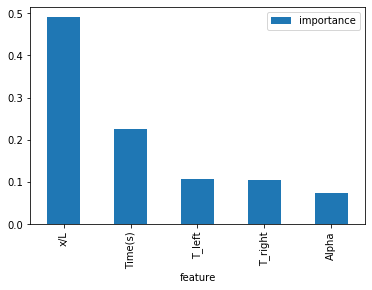

In [23]:
importances.plot.bar()

In [24]:
rf.oob_score_

0.9823199533106728

In [25]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
640,300.000000,280.090959
2804,350.000000,329.294603
2746,400.000000,400.000000
4313,400.000000,400.000000
1158,60.078125,66.132340
...,...,...
4888,27.000000,27.635963
3955,30.378588,31.424321
3914,49.905918,44.891397
3487,28.038563,27.738214


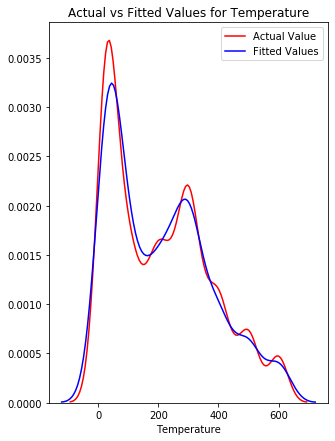

In [26]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature')


plt.show()
plt.close()

In [27]:
x_test = np.array([0.8,0.33,8e-6,400,150])
x_test = x_test.reshape((1,-1))
y_pred = rf.predict(x_test)

In [28]:
print ("The predicted temperature for the given parameters is", y_pred[0])

The predicted temperature for the given parameters is 14.34217847571514


In [29]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [30]:
#from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import validation_curve

In [31]:
#x, y = load_energy()
x = data[['T_left', 'T_right','Time(s)', 'Alpha', 'x/L']]
y = data['Temperature']

In [32]:
parameter_range = np.arange(1, 15, 1)

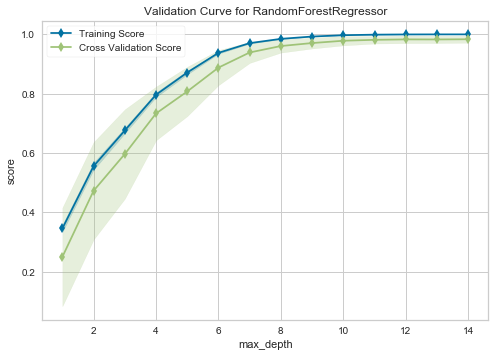

In [33]:
viz = validation_curve(RandomForestRegressor(), x, y, param_name = "max_depth", param_range = parameter_range, cv = 10, scoring = "r2")

In [34]:
viz.fit(x,y)
viz.show()

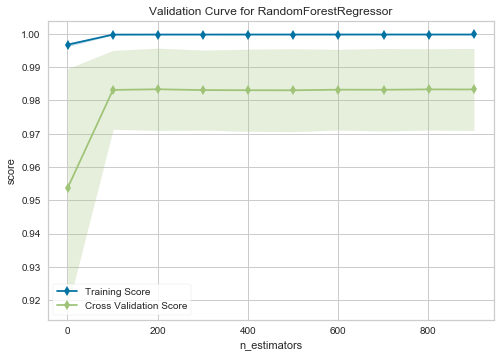

In [35]:
parameter_range = np.arange(1, 1000, 100)
viz = validation_curve(RandomForestRegressor(), x, y, param_name = "n_estimators", param_range = parameter_range, cv = 10, scoring = "r2")

In [36]:
from yellowbrick.model_selection import learning_curve

x = data[['T_left', 'T_right','Time(s)', 'Alpha', 'x/L']]
y = data['Temperature']

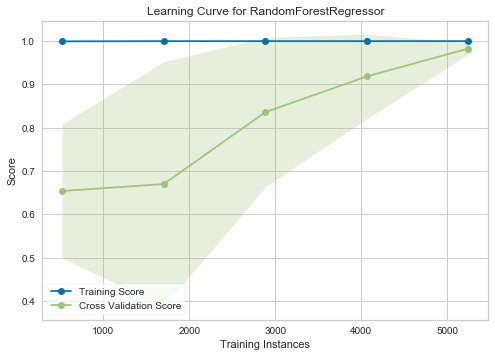

LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002833BC553C8>,
              cv=10,
              estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                              criterion='mse', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [37]:
print(learning_curve(RandomForestRegressor(), x, y, cv=10, scoring='r2'))

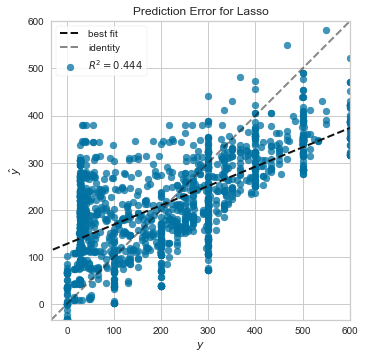

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError

# Load a regression dataset
x = data[['T_left', 'T_right','Time(s)', 'Alpha', 'x/L']]
y = data['Temperature']

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure